In [1]:
%pylab inline
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K
import tensorflow as tf
import sklearn.metrics as metrics

import time

from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec

#from scipy.misc import imread
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, normalized_mutual_info_score


Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

In [3]:
print(os.getcwd())
root_dir = os.path.abspath('../')
data_dir = os.path.join(root_dir, 'data', 'mnist')
print(root_dir)
print(data_dir)

/home/jbang36/eva/others/jupyter
/home/jbang36/eva/others
/home/jbang36/eva/others/data/mnist


In [4]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

8


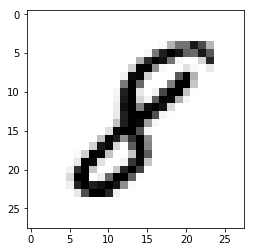

In [5]:
import matplotlib.pyplot as plt
image_index = 7777 # You may select anything up to 60,000
print(train_y[image_index]) # The label is 8
plt.imshow(train_x[image_index], cmap='Greys')

In [6]:
train_x = train_x.reshape(-1, 784).astype('float32')
test_x = test_x.reshape(-1, 784).astype('float32')
train_x /= 255.0
test_x /= 255.0

In [7]:
#Autoencoder network
# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(500, activation='relu')(input_img)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(2000, activation='relu')(encoded)

#Value I want to play around with is thisi signmoid
encoded = Dense(10, activation='sigmoid')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(2000, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(784)(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.summary()
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer='adam', loss='mse')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              22000     
_________________________________________________________________
dense_6 (Dense)              (None, 500)               1000500   
__________

In [8]:
train_history = autoencoder.fit(train_x, train_x, epochs=200, batch_size=2048, validation_data=(test_x, test_x))


Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 4s 60us/step - loss: 0.0738 - val_loss: 0.0647
Epoch 2/200
60000/60000 [==============================] - 1s 11us/step - loss: 0.0639 - val_loss: 0.0635
Epoch 3/200
60000/60000 [==============================] - 1s 11us/step - loss: 0.0630 - val_loss: 0.0605
Epoch 4/200
60000/60000 [==============================] - 1s 11us/step - loss: 0.0556 - val_loss: 0.0506
Epoch 5/200
60000/60000 [==============================] - 1s 11us/step - loss: 0.0467 - val_loss: 0.0424
Epoch 6/200
60000/60000 [==============================] - 1s 11us/step - loss: 0.0394 - val_loss: 0.0365
Epoch 7/200
60000/60000 [==============================] - 1s 11us/step - loss: 0.0346 - val_loss: 0.0326
Epoch 8/200
60000/60000 [==============================] - 1s 11us/step - loss: 0.0315 - val_loss: 0.0295
Epoch 9/200
60000/60000 [==============================] - 1s 11us/step - loss: 0.0291 - val_loss: 0.0

60000/60000 [==============================] - 1s 13us/step - loss: 0.0145 - val_loss: 0.0151
Epoch 78/200
60000/60000 [==============================] - 1s 11us/step - loss: 0.0144 - val_loss: 0.0151
Epoch 79/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0143 - val_loss: 0.0150
Epoch 80/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0143 - val_loss: 0.0151
Epoch 81/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0142 - val_loss: 0.0149
Epoch 82/200
60000/60000 [==============================] - 1s 11us/step - loss: 0.0143 - val_loss: 0.0149
Epoch 83/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0141 - val_loss: 0.0149
Epoch 84/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0141 - val_loss: 0.0149
Epoch 85/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0140 - val_loss: 0.0149
Epoch 86/200
60000/60000 [========================

60000/60000 [==============================] - 1s 12us/step - loss: 0.0123 - val_loss: 0.0137
Epoch 154/200
60000/60000 [==============================] - 1s 11us/step - loss: 0.0121 - val_loss: 0.0135
Epoch 155/200
60000/60000 [==============================] - 1s 11us/step - loss: 0.0121 - val_loss: 0.0135
Epoch 156/200
60000/60000 [==============================] - 1s 11us/step - loss: 0.0121 - val_loss: 0.0137
Epoch 157/200
60000/60000 [==============================] - 1s 11us/step - loss: 0.0121 - val_loss: 0.0135
Epoch 158/200
60000/60000 [==============================] - 1s 11us/step - loss: 0.0121 - val_loss: 0.0135
Epoch 159/200
60000/60000 [==============================] - 1s 11us/step - loss: 0.0121 - val_loss: 0.0135
Epoch 160/200
60000/60000 [==============================] - 1s 11us/step - loss: 0.0121 - val_loss: 0.0135
Epoch 161/200
60000/60000 [==============================] - 1s 11us/step - loss: 0.0120 - val_loss: 0.0135
Epoch 162/200
60000/60000 [===============

In [9]:
pred_auto_train = encoder.predict(train_x)
pred_auto = encoder.predict(test_x)

In [10]:
print(pred_auto_train[0])
print(pred_auto_train[1])
%timeit np.linalg.norm(pred_auto_train[0] - pred_auto_train[0])

[0.80977505 0.12959942 0.3405935  0.6722396  0.41602293 0.71425617
 0.813507   0.6283709  0.14332438 0.22720961]
[0.17451365 0.3762826  0.52468884 0.74122053 0.45649487 0.6522731
 0.58688444 0.4142691  0.6644179  0.49010903]
4.62 µs ± 666 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
# Compute the L2 distance matrix

print(train_y[:100])

n_train = len(pred_auto_train)
n_train = 1000
dist_m = np.ndarray(shape = (n_train, n_train))

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


In [12]:
for i in range(n_train):
    for j in range(n_train):
        if j <= i:
            # Make dist with itself and repeating distances irrelevant
            dist_m[i][j] = -1
        else:
            dist_m[i][j] = np.linalg.norm(pred_auto_train[i] - pred_auto_train[j])

In [14]:
dist_flattened = np.reshape(dist_m, (1, -1))
dist_done = dist_flattened[dist_flattened != -1]



In [ ]:
"""
buckets = np.linspace(0,1000,10000)
buckets_count = np.zeros(10000)

points_not_categorized = 0
for i in range(len(dist_flattened)):
    if dist_flattened[i] != -1:
        # we have granularity of 0.1 
        index_conversion = int(dist_flattened * 10)
        if index_conversion > len(buckets_count): 
            points_not_categorized += 1
        else:    
            buckets_count[index_conversion] += 1
"""


(array([1., 0., 0., ..., 0., 0., 1.]),
 array([0.04013323, 0.04030069, 0.04046814, ..., 1.71435685, 1.7145243 ,
        1.71469176]),
 <a list of 10000 Patch objects>)

/nethome/jbang36/anaconda3/envs/jb_py35/lib/python3.5/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


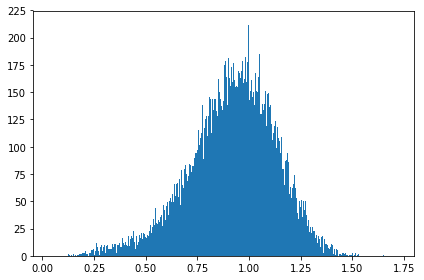

In [16]:
# draw the buckets as a histogram
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(dist_done, bins=10000)
plt.xlabel("Distance")
plt.ylabel("Number of datapoints")


In [18]:
# Since the above graph is not meaningful, I want to see there is any difference in terms of L2 distance
# for points that are within a category and those that are not

# 1. Distance between members of its own group

n_train = 500
dist_hetero = np.ndarray(shape = (n_train, n_train))
dist_homo = np.ndarray(shape = (n_train, n_train))

for i in range(n_train):
    for j in range(n_train):
        if j <= i:
            # Make dist with itself and repeating distances irrelevant
            dist_hetero[i][j] = -1
            dist_homo[i][j] = -1
        elif train_y[i] == train_y[j]: #the points are within the same category
            dist_hetero[i][j] = -1
            dist_homo[i][j] = np.linalg.norm(pred_auto_train[i] - pred_auto_train[j])
        else: #the points are in different categories
            dist_hetero[i][j] = np.linalg.norm(pred_auto_train[i] - pred_auto_train[j])
            dist_homo[i][j] = -1


In [19]:
dist_hetero_flattened = np.reshape(dist_hetero, (1, -1))
dist_homo_flattened = np.reshape(dist_homo, (1, -1))

dist_hetero_done = dist_hetero_flattened[dist_hetero_flattened != -1]
dist_homo_done = dist_homo_flattened[dist_homo_flattened != -1]



Text(0, 0.5, 'Number of datapoints')

/nethome/jbang36/anaconda3/envs/jb_py35/lib/python3.5/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


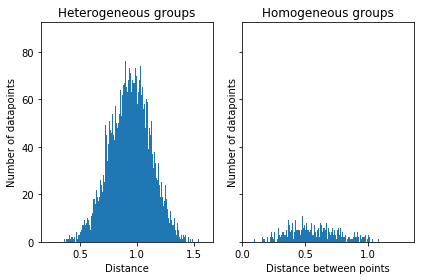

In [22]:
# redraw histogram
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(dist_hetero_done, bins=5000)
axs[0].set_title("Heterogeneous groups")
axs[0].set_xlabel("Distance")
axs[0].set_ylabel("Number of datapoints")
axs[1].hist(dist_homo_done, bins = 5000)
axs[1].set_title("Homogeneous groups")
axs[1].set_xlabel("Distance between points")
axs[1].set_ylabel("Number of datapoints")